In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size = "small", case = "balanced")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x05\x00\x00\x00\xcc\x08\x06\x00\x00\x00z\x06\xb6…

In [2]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

from qiskit.visualization import plot_histogram


In [5]:
n = 3

In [6]:
n = 3 
const_oracle = QuantumCircuit(n + 1) 
output = np.random.randint(2) 
if output == 1: 
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [7]:
balanced_oracle = QuantumCircuit(n + 1)


In [8]:
b_str = "101"

In [9]:
balanced_oracle = QuantumCircuit(n + 1)
b_str = "101"
for qubit in range(len(b_str)):
    if (b_str[qubit] == '1'):
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

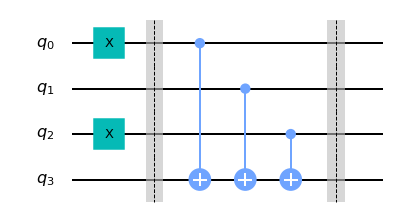

In [10]:
balanced_oracle = QuantumCircuit(n + 1)
b_str = "101"

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()
balanced_oracle.draw('mpl')

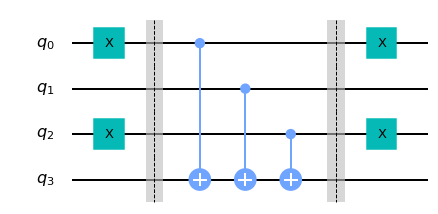

In [11]:
balanced_oracle = QuantumCircuit(n + 1)
b_str = "101"
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier()

for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

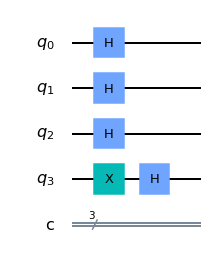

In [13]:
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

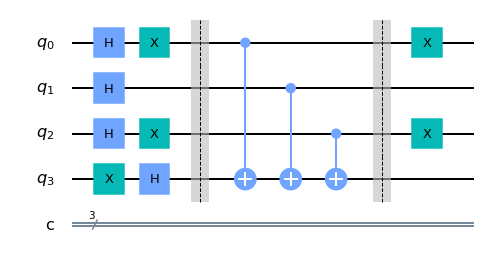

In [14]:
dj_circuit = QuantumCircuit(n +1, n)
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit += balanced_oracle
dj_circuit.draw('mpl')

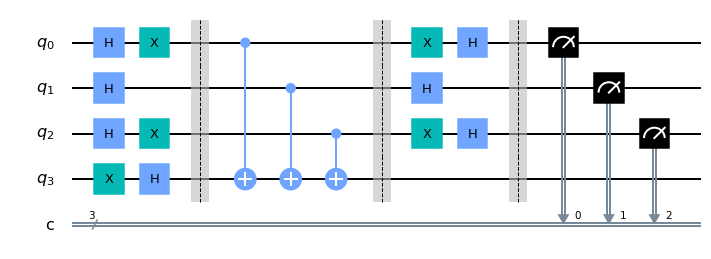

In [15]:
dj_circuit = QuantumCircuit(n+1, n)
for qubit in range(n):
    dj_circuit.h(qubit)

    
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit += balanced_oracle

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i,i)

dj_circuit.draw('mpl')

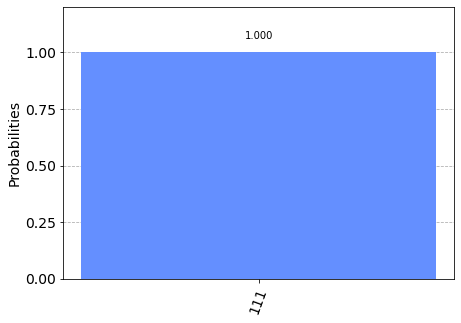

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [17]:
def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n + 1)
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        
        b_str = format(b, '0'+str(n)+'b')
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [19]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1,n)
    dj_circuit.x(n)
    dj_circuit.h(n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.append(oracle, range(n+1))
    
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i,i)
    return dj_circuit

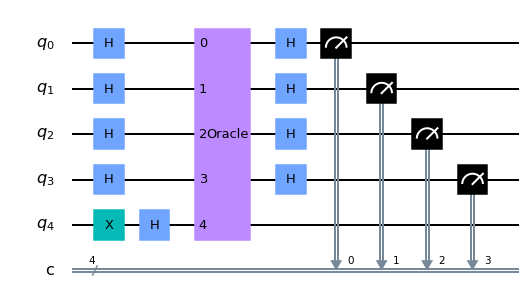

In [20]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

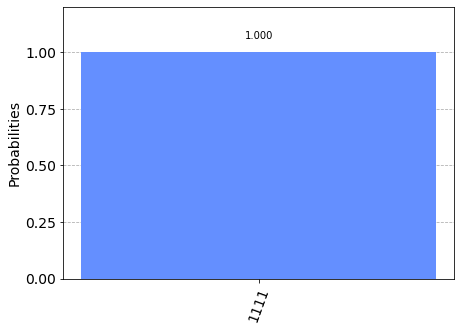

In [21]:
results = execute(dj_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer)


In [24]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and 
                                       not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


/home/note/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_ourense


In [26]:
from qiskit.tools.monitor import job_monitor

shots =1024
job = execute(dj_circuit, backend = backend, shots = shots, optimization_level = 3)
job_monitor(job, interval = 2)

Job Status: job has successfully run


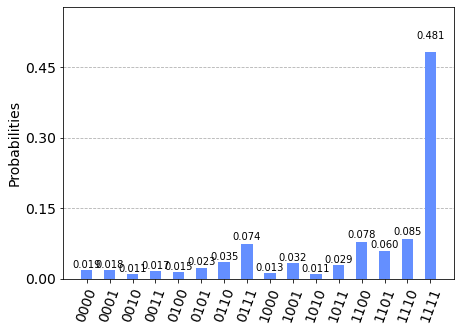

In [27]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [46]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(4)

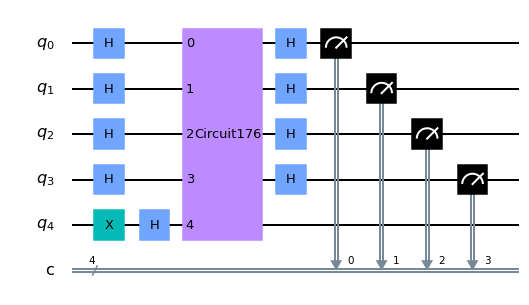

In [44]:
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw('mpl')


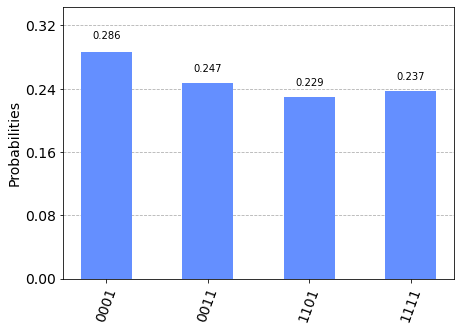

In [45]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)